# Generador de la frontera estocástica

## Importación de bibliotecas y módulos

In [1]:
from IPython import display
import ipywidgets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                  
sns.set_context("paper", font_scale = 1.6)  # Tamaño de fuente en el contexto de un "paper"

## Función generadora

In [3]:
def ruido(nr, st, base, desfase):
    techo = base + 2 * desfase
    promedio = base + desfase
    desviacion = desfase / 4.0
    # Construccion
    epsilon = np.random.normal(
        loc = promedio,
        scale = desviacion,
        size = (nr, st))
    # Correccion de valores
    epsilon[epsilon > techo] = techo
    epsilon[epsilon < base] = base
    # Primer valor
    epsilon[:, 0] = promedio
    
    return epsilon

## Parámetros

Fronteras

In [4]:
nr = 144
base = 1.0
desfase = 0.1

Tiempo

In [5]:
Lt = 1.0
nt = 50_001
t = np.linspace(0, Lt, nt)
dt = t[1] - t[0]
dt

2e-05

Espacio

In [6]:
Lx = 1.0
nx = 161
x = np.linspace(0, Lx, nx)
dx = x[1] - x[0]
dx

0.00625

## Arreglos de interés

In [7]:
nt_ets = 100
t_ets_pasos = np.linspace(1, nt_ets, nt_ets)
t_ets = dt * t_ets_pasos

## Inicialización del ruido (frontera estocástica)

In [8]:
frontera = ruido(nr, nt, base, desfase)
print("Terminado")

Terminado


## Distribución

### Analítica

In [9]:
Tv = np.linspace(frontera.min(), frontera.max(), 10001)
mu = frontera.mean()
sigma = frontera.std()
dist_teorica = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- ((Tv - mu)**2) / (2 * sigma**2))
print("Promedio: ", mu)
print("Var. Est.: ", sigma)

Promedio:  1.100000204145087
Var. Est.:  0.024994270139966347


### Gráfica

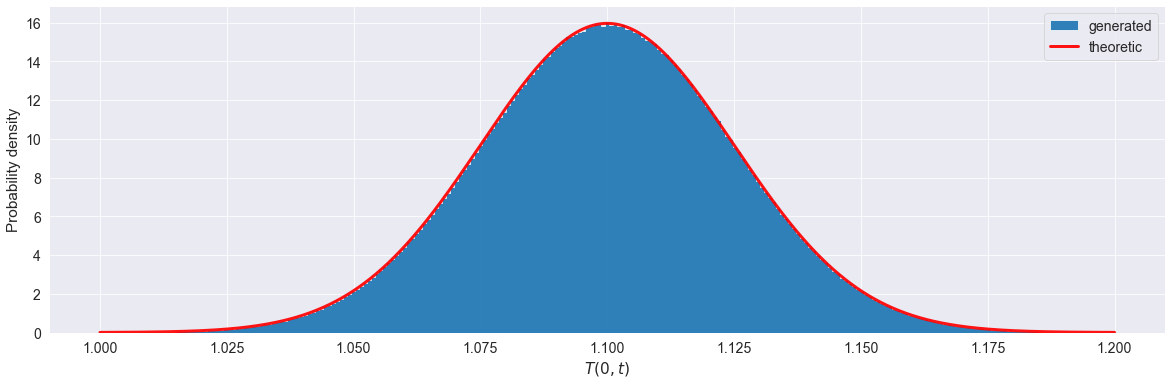

In [10]:
plt.figure(figsize = (20, 6))
plt.ylabel("Probability density")
plt.xlabel("$T(0, t)$")
plt.hist(frontera.ravel(), bins = 255, density = True, histtype = "stepfilled", alpha = 0.92, label = "generated")
plt.plot(Tv, dist_teorica, lw = 3.0, c = "r", alpha = 0.92, label = "theoretic")
plt.legend(loc = "best")
plt.savefig("graficas/frontera/distribucion_frontera.pdf", bbox_inches = "tight")
plt.show()

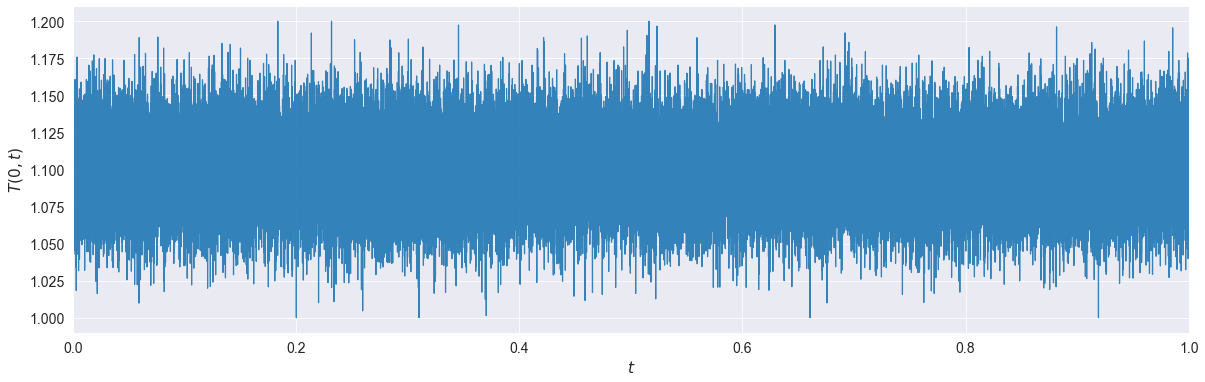

In [11]:
plt.figure(figsize = (20, 6))
plt.ylabel("$T(0, t)$")
plt.xlabel("$t$")
plt.xlim(t.min(), t.max())
plt.plot(t, frontera[0], alpha = 0.9)
plt.savefig("graficas/frontera/serie_frontera.pdf", bbox_inches = "tight")
plt.show()

## Variación inicial especial de la temperatura

In [12]:
variacion_inicial = np.random.normal(0, 0.00005, size = (nr, nx))
variacion_inicial[:, : 3] = variacion_inicial[:, -3 :] = 0

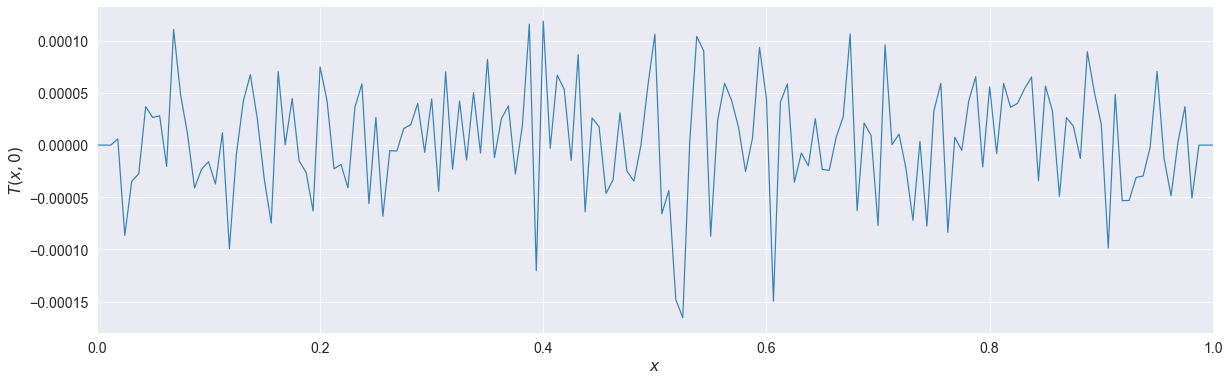

In [13]:
plt.figure(figsize = (20, 6))
plt.ylabel("$T(x, 0)$")
plt.xlabel("$x$")
plt.xlim(x.min(), x.max())
plt.plot(x, variacion_inicial[0], alpha = 0.9)
plt.savefig("graficas/frontera/condicion_inicial.pdf", bbox_inches = "tight")
plt.show()

## Archivos

In [14]:
ruta = "datos/base/"
nt_ch = str(nt)  # String del numero de puntos en la malla del tiempo

# Archivos para las simulaciones
np.savetxt(ruta + "fronteras.csv", frontera, delimiter = ",")
np.savetxt(ruta + "tiempo_simulacion.csv", t)
np.savetxt(ruta + "variacion_inicial.csv", variacion_inicial)
np.savetxt(ruta + "espacio_simulacion.csv", x)
# Archivos para graficar la series de entropia de transferencia
np.savetxt(ruta + "pasos_ets.csv", t_ets_pasos)
np.savetxt(ruta + "tiempo_ets.csv", t_ets)